In [1]:
import time
import ROOT
import math
import numpy as np
import pandas as pd
import root_numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.22/02


In [2]:
def getData(inputFiles):
    data = root_numpy.root2array(inputFiles, "Tree", \
                                 branches=['xsec','ntrials','pt_jet', 'p_jet', 'eta_jet', 'phi_jet', 'theta_jet'])
    return pd.DataFrame(data)

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [10]:
def toArrayFloat(begin, end, interval=0, log=False, logNum=0):
    array = []
    if log==True:
        array = np.logspace(begin, end, num=logNum)
    else:
        length = int((end - begin) / interval + 1)
        for i in range(0,length):
            array.append((float(begin + interval * i))) 
    return array

In [11]:
def getInterval(arrayFloat):
    interval = np.zeros(len(arrayFloat)-1)
    for i in range(0,len(arrayFloat)-1):
        interval[i] = arrayFloat[i+1] - arrayFloat[i]
    return interval

In [12]:
def getHist(df, var, binEdges):
        
    x = []
    for i in range(0,len(binEdges)-1):
        x.append((binEdges[i] + binEdges[i+1]) / 2)
    
    y = np.histogram(df[var], bins=binEdges)[0]
    
    xerr = getInterval(binEdges)/2
    
    return x, y, xerr

In [4]:
file1 = ['$HOME/output/pp6.root']

In [5]:
a = getData(file1)

In [6]:
print (min(a['pt_jet']), max(a['pt_jet']))

0.20000000298023224 418.5517883300781


In [13]:
df = applyCut(a, '0.2 < eta_jet < 0.8', '0.2 < eta < 0.8')
df = applyCut(df, 'pt_jet > 5', 'pt_jet > 5')

0.2 < eta < 0.8 1609418  fraction kept: 6.0
pt_jet > 5 6470  fraction kept: 0.4


In [14]:
xvar_array = toArrayFloat(0.69, 1.60, 0, log=True, logNum=11)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
x1, y1, xerr = getHist(df, 'pt_jet', xvar_array)

Text(35, 400000.0, '$\\sqrt{s} = 200 \\, \\mathrm{GeV}$')

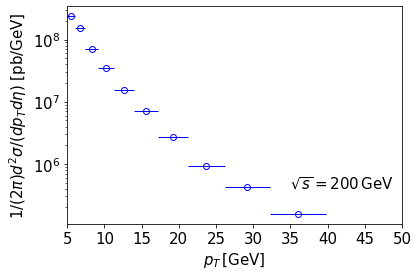

In [17]:
# To compare with https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.97.252001
plt.errorbar(x1, 1/(2*np.pi)*y1*xsec*1e9/(2*ntrials*xerr*0.6), xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, 1/(2*np.pi)*y1*xsec*1e9/(2*ntrials*xerr*0.6), 'bo', fillstyle='none', label='$p_T^{electron}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T$ [GeV]', fontsize=15)
plt.ylabel(r'$1 / (2\pi) d^2 \sigma / (dp_T d \eta)$ [pb/GeV]', fontsize=15)
plt.xlim(left=5, right=50)
#plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(35,4e5,'$\sqrt{s} = 200 \, \mathrm{GeV}$', fontsize=15)

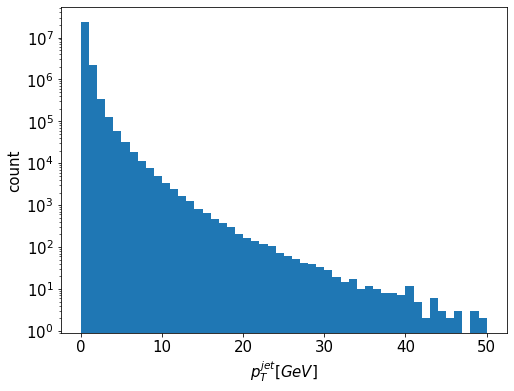

In [9]:
fig = plt.figure(figsize=(8,6))
plt.hist(a['pt_jet'], range=(0,50), bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$p_T^{jet} [GeV]$', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.yscale('log')

Text(0, 0.5, 'count')

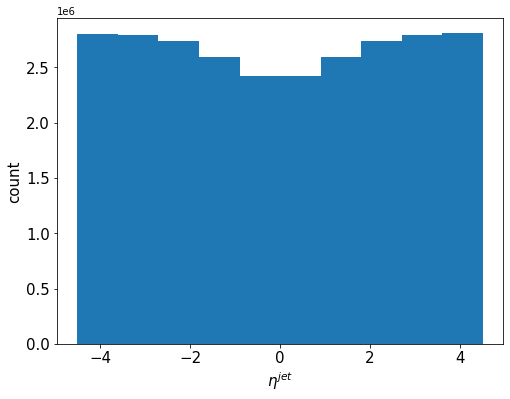

In [8]:
fig = plt.figure(figsize=(8,6))
plt.hist(a['eta_jet'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$\eta^{jet}$', fontsize=15)
plt.ylabel('count', fontsize=15)